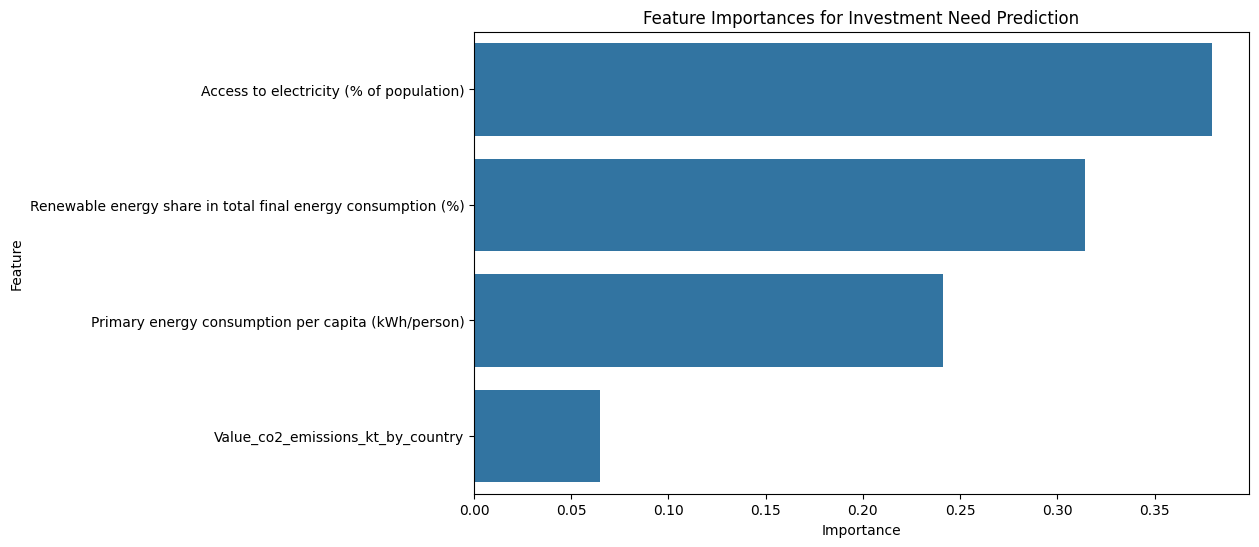

Countries Classified as Needing Renewable Investment:
['Afghanistan', 'Algeria', 'Dominican Republic', 'Ecuador', 'El Salvador', 'Equatorial Guinea', 'Guyana', 'Indonesia', 'Jamaica', 'Libya', 'Mongolia', 'Panama', 'South Africa', 'Suriname']

Countries Classified as Not Needing Renewable Investment:
['Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark', 'Djibouti', 'Dominica', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Hon

In [2]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'Sustainable_Energy.csv'  # Adjust if needed
data = pd.read_csv(file_path)

# Data Preparation: Selecting relevant columns and keeping only the most recent year per country
columns_of_interest = ['Entity', 'Year', 'Access to electricity (% of population)', 
                       'Renewable energy share in the total final energy consumption (%)', 
                       'Primary energy consumption per capita (kWh/person)', 
                       'Value_co2_emissions_kt_by_country']
data = data[columns_of_interest].dropna()
most_recent_data = data.loc[data.groupby('Entity')['Year'].idxmax()]  # Keeping the most recent year for each country

# Creating a target label for countries needing investment
# Custom criteria: Countries with low access to electricity, low renewable energy share, and high CO2 emissions
access_threshold = most_recent_data['Access to electricity (% of population)'].quantile(0.45)  # Bottom 45%
renewable_share_threshold = most_recent_data['Renewable energy share in the total final energy consumption (%)'].quantile(0.45)  # Bottom 45%
co2_threshold = most_recent_data['Value_co2_emissions_kt_by_country'].quantile(0.10)  # Bottom 10%
most_recent_data['Target'] = ((most_recent_data['Access to electricity (% of population)'] < access_threshold) &
                              (most_recent_data['Renewable energy share in the total final energy consumption (%)'] < renewable_share_threshold) &
                              (most_recent_data['Value_co2_emissions_kt_by_country'] > co2_threshold)).astype(int)

# Retaining original country names for display
most_recent_data['Original_Entity'] = most_recent_data['Entity']  # Preserve original names for output

# Encoding 'Entity' (countries) for modeling purposes
most_recent_data['Entity_encoded'] = most_recent_data['Entity'].astype('category').cat.codes

# Standardizing features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(most_recent_data[['Access to electricity (% of population)', 
                                                         'Renewable energy share in the total final energy consumption (%)', 
                                                         'Primary energy consumption per capita (kWh/person)', 
                                                         'Value_co2_emissions_kt_by_country']])
X = scaled_features
y = most_recent_data['Target']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
most_recent_data['Predicted_Target'] = rf_classifier.predict(X)

# Visualizing feature importance
feature_importances = rf_classifier.feature_importances_
features = ['Access to electricity (% of population)', 
            'Renewable energy share in total final energy consumption (%)', 
            'Primary energy consumption per capita (kWh/person)', 
            'Value_co2_emissions_kt_by_country']
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features)
plt.title('Feature Importances for Investment Need Prediction')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Outputting countries based on model predictions
classified_as_needing_investment = most_recent_data.loc[most_recent_data['Predicted_Target'] == 1, 'Original_Entity']
classified_as_not_needing_investment = most_recent_data.loc[most_recent_data['Predicted_Target'] == 0, 'Original_Entity']

print("Countries Classified as Needing Renewable Investment:")
print(sorted(classified_as_needing_investment.unique()))

print("\nCountries Classified as Not Needing Renewable Investment:")
print(sorted(classified_as_not_needing_investment.unique()))


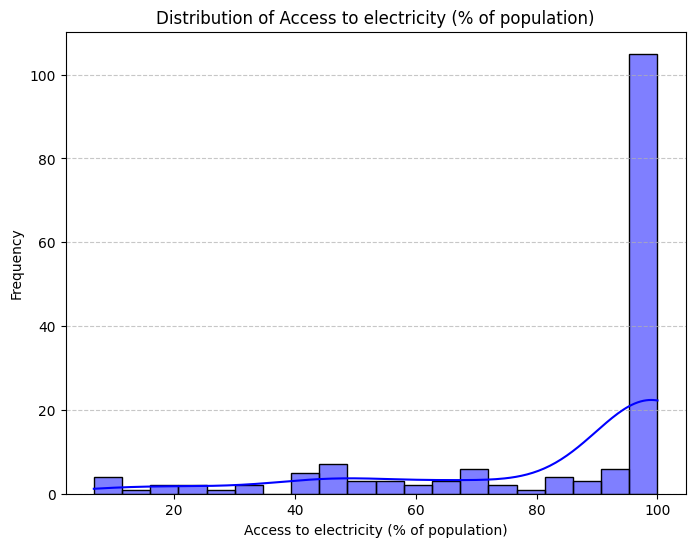

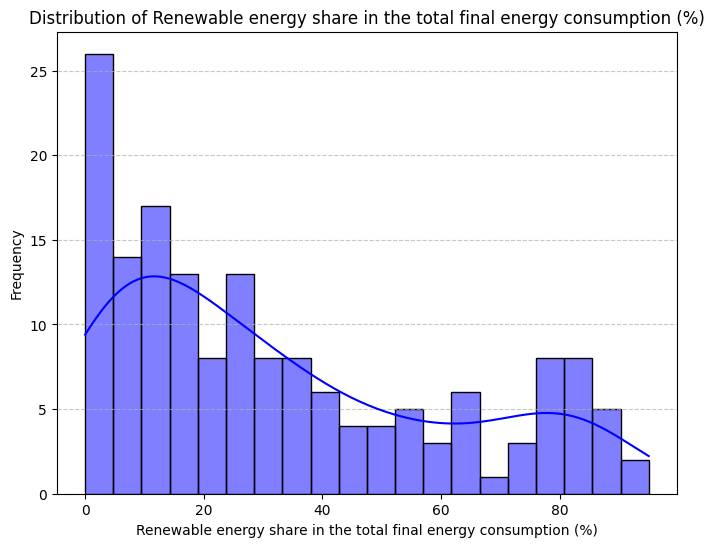

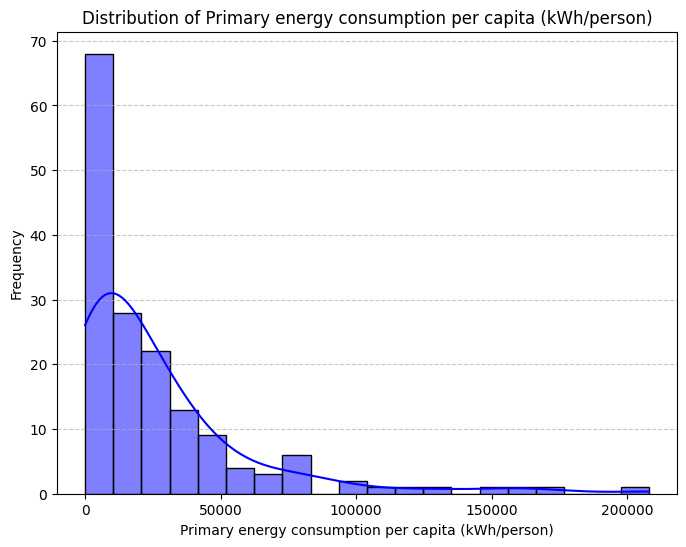

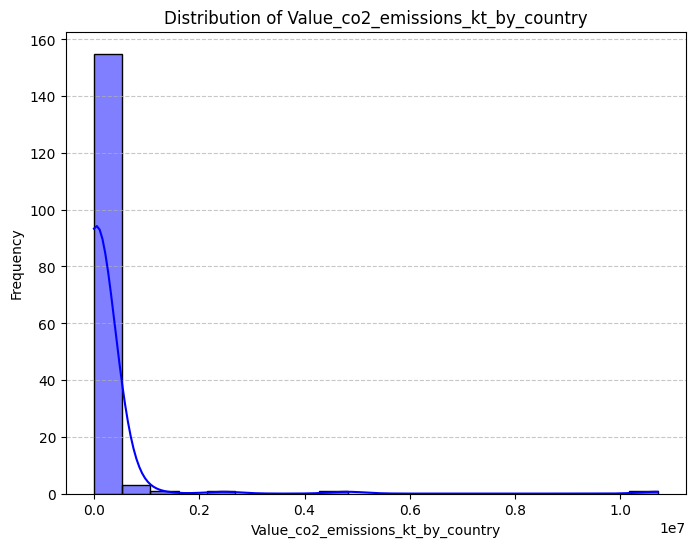

In [5]:

# Visualizing feature distributions with labeled axes
features = ['Access to electricity (% of population)', 
            'Renewable energy share in the total final energy consumption (%)', 
            'Primary energy consumption per capita (kWh/person)', 
            'Value_co2_emissions_kt_by_country']

# Creating individual histograms for better labeling
for feature in features:
    plt.figure(figsize=(8, 6))
    sns.histplot(most_recent_data[feature], bins=20, kde=True, color="blue", edgecolor="black")
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

In [4]:
# Shape of the data
print(f"Data Shape: {most_recent_data.shape}")

# Checking for missing values
missing_values = most_recent_data.isnull().sum()
print("Missing Values:")
print(missing_values)

Data Shape: (162, 10)
Missing Values:
Entity                                                              0
Year                                                                0
Access to electricity (% of population)                             0
Renewable energy share in the total final energy consumption (%)    0
Primary energy consumption per capita (kWh/person)                  0
Value_co2_emissions_kt_by_country                                   0
Target                                                              0
Original_Entity                                                     0
Entity_encoded                                                      0
Predicted_Target                                                    0
dtype: int64
